In [3]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from sklearn import preprocessing
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('C:/Users/j8003/OneDrive/桌面/BDSE26/for_jj.csv')
df

In [ ]:
print(df["sna"] == "YouBike2.0_臺大總圖書館西南側" )



In [ ]:
filt = df['sna'].str.contains('捷運公館站', na=False)

file1 = df.loc[filt,['sbi','bemp', 'sna','infoDate']]

print(file1)



In [ ]:
#長條圖
filt = df['sna'].str.contains('YouBike2.0_臺大總圖書館西南側', na=False)

file1 = df.loc[filt,['sbi','bemp','tot', 'sna','updateTime']]

print(file1)

chart = file1.plot(kind='bar',  #圖表類型
		    title='YouBike2.0_臺大總圖書館西南側',  #圖表標題
                    xlabel='租借數',  #x軸說明文字
                    ylabel='時間',  #y軸說明文字
                    legend=True,  # 是否顯示圖例
                    figsize=(10, 5))  # 圖表大小
plt.show()


In [ ]:
filt = df['sna'].str.contains('YouBike2.0_臺大總圖書館西南側', na=False)

file1 = df.loc[filt,['sbi','bemp','tot', 'sna','updateTime']]

print(file1)

x = range(101)
y1 = df.loc[filt,['sbi']]
y2 = df.loc[filt,['bemp']]

plt.figure(figsize=(10,6))
plt.bar(x, y1, label='y1')    # 加入 yerr 參數
plt.bar(x, y2, bottom=y1, label='y2')
plt.ylim(0,30)
plt.legend()
for i in x:
  plt.text(i,
          y1[i]/2 - 0.5,                 # 計算垂直高度
          y1[i],
          fontsize=14,
          horizontalalignment='center')  # 設定 horizontalalignment 屬性水平置中
  plt.text(i,
          y2[i]/2 + y1[i] - 0.5,
          y2[i],
          fontsize=14,
          horizontalalignment='center')

#   plt.text(i,
#           total[i] + 1.5,
#           total[i],
#           fontsize=14,
#           horizontalalignment='center')
plt.show()


In [ ]:
import string
import matplotlib.pyplot as plt
x = range(0,5)
y1 = np.array(file1.sbi)
#y1 = np.array[str.split(str="sbi", string.count(str))]
# y1 = np.array[filt,['sbi']]
# y1.astype(int)
# print(y1)
y2 = np.array(file1.bemp)
#y2 = np.array[filt,['bemp']]
plt.bar(x, y1)
plt.bar(x, y2,bottom=y1)
plt.show()

In [47]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
df = pd.read_csv('C:/Users/j8003/OneDrive/桌面/BDSE26/for_jj.csv')
print(df.head())

    Unnamed: 0                     sna   tot  sbi sarea                 mday  \
0  500101001.0      YouBike2.0_捷運科技大樓站  28.0  2.0   大安區  2022-07-15 12:07:10   
1  500101002.0  YouBike2.0_復興南路二段273號前  22.0  0.0   大安區  2022-07-15 11:44:04   
2  500101003.0    YouBike2.0_國北教大實小東側門  16.0  1.0   大安區  2022-07-15 12:08:11   
3  500101004.0       YouBike2.0_和平公園東側  11.0  4.0   大安區  2022-07-15 11:58:11   
4  500101005.0    YouBike2.0_辛亥復興路口西北側  16.0  0.0   大安區  2022-07-15 12:10:11   

        lat        lng             ar     sareaen  \
0  25.02605  121.54360    復興南路二段235號前  Daan Dist.   
1  25.02565  121.54357   復興南路二段273號西側  Daan Dist.   
2  25.02429  121.54124    和平東路二段96巷7號  Daan Dist.   
3  25.02351  121.54282  和平東路二段118巷33號  Daan Dist.   
4  25.02153  121.54299     復興南路二段368號  Daan Dist.   

                                               snaen  \
0               YouBike2.0_MRT Technology Bldg. Sta.   
1           YouBike2.0_No.273， Sec. 2， Fuxing S. Rd.   
2  YouBike2.0_NTUE Experiment El

In [49]:
df_new=df[['sbi','bemp','tot','updateTime']]
df_new

,sbi,bemp,tot,updateTime
0,2.0,26.0,28.0,2022-07-15 12:10:51
1,0.0,22.0,22.0,2022-07-15 12:10:51
2,1.0,15.0,16.0,2022-07-15 12:10:51
3,4.0,7.0,11.0,2022-07-15 12:10:51
4,0.0,16.0,16.0,2022-07-15 12:10:51
...,...,...,...,...
112410,19.0,11.0,30.0,2022-07-15 17:19:51
112411,7.0,13.0,20.0,2022-07-15 17:19:51
112412,3.0,7.0,10.0,2022-07-15 17:19:51
112413,NaN,NaN,NaN,NaN


In [50]:
nan_replaced = df_new.replace(np.nan,0)
nan_replaced



,sbi,bemp,tot,updateTime
0,2.0,26.0,28.0,2022-07-15 12:10:51
1,0.0,22.0,22.0,2022-07-15 12:10:51
2,1.0,15.0,16.0,2022-07-15 12:10:51
3,4.0,7.0,11.0,2022-07-15 12:10:51
4,0.0,16.0,16.0,2022-07-15 12:10:51
...,...,...,...,...
112410,19.0,11.0,30.0,2022-07-15 17:19:51
112411,7.0,13.0,20.0,2022-07-15 17:19:51
112412,3.0,7.0,10.0,2022-07-15 17:19:51
112413,0.0,0.0,0.0,0


In [51]:
nan_notna=df_new.notna()
nan_notna


,sbi,bemp,tot,updateTime
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True
4,True,True,True,True
...,...,...,...,...
112410,True,True,True,True
112411,True,True,True,True
112412,True,True,True,True
112413,False,False,False,False


In [52]:

nan_dropna=df_new.dropna().reset_index(drop=True)
nan_dropna


,sbi,bemp,tot,updateTime
0,2.0,26.0,28.0,2022-07-15 12:10:51
1,0.0,22.0,22.0,2022-07-15 12:10:51
2,1.0,15.0,16.0,2022-07-15 12:10:51
3,4.0,7.0,11.0,2022-07-15 12:10:51
4,0.0,16.0,16.0,2022-07-15 12:10:51
...,...,...,...,...
112347,8.0,6.0,14.0,2022-07-15 17:19:51
112348,7.0,3.0,10.0,2022-07-15 17:19:51
112349,19.0,11.0,30.0,2022-07-15 17:19:51
112350,7.0,13.0,20.0,2022-07-15 17:19:51


In [53]:

nan_dropna.apply(lambda x: x**2 if x.name == 'tot' else x)


,sbi,bemp,tot,updateTime
0,2.0,26.0,784.0,2022-07-15 12:10:51
1,0.0,22.0,484.0,2022-07-15 12:10:51
2,1.0,15.0,256.0,2022-07-15 12:10:51
3,4.0,7.0,121.0,2022-07-15 12:10:51
4,0.0,16.0,256.0,2022-07-15 12:10:51
...,...,...,...,...
112347,8.0,6.0,196.0,2022-07-15 17:19:51
112348,7.0,3.0,100.0,2022-07-15 17:19:51
112349,19.0,11.0,900.0,2022-07-15 17:19:51
112350,7.0,13.0,400.0,2022-07-15 17:19:51


In [ ]:
nan_dropna=nan_dropna.assign(Empty_1="",Empty_2=np.nan)
nan_dropna

In [ ]:
nan_dropna =nan_dropna.replace(np.NaN,0)

In [ ]:
#nan_dropna ['Empty_1'].fillna(nan_dropna[])

df_new_date=nan_dropna.loc[nan_dropna['tot'].isnull(),'tot']=nan_dropna[nan_dropna['tot'].isnull()]['Empty_1'] 
df_new_date



In [ ]:

nan_dropna.replace([NaN],1400) 


In [ ]:
bike_future = pd.read_csv()

In [38]:
from sympy import LM
from sklearn.linear_model import LinearRegression as lm

# nan_dropna
# df_new=df[['sbi','bemp','tot','updateTime']]
hourFactor = pd.get_dummies(nan_dropna['updateTime'])
working=nan_dropna['sbi'].values.reshape(-1,1)
temp = nan_dropna['bemp'].values.reshape(-1,1)
tempSq=pow(temp,2)
pre = nan_dropna['tot'].values.reshape(-1,1)
X_future = np.hstack((hourFactor,working,temp,tempSq,pre))
lent_predict = lm.predict(X_future)

TypeError: predict() missing 1 required positional argument: 'X'

In [ ]:
filt = df['sna'].str.contains('捷運公館站', na=False)

file1 = df.loc[filt,['sna','sbi','bemp', 'infoDate']]

print(file1)

In [ ]:
X=file1[['sbi']]
y=file1[['bemp']]
print(X.head())

# print('accuracy: {}'.format(accuracy))
# print('confusion matrix: {}'.format(con_matrix))

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
model=LogisticRegression()
model.fit(X_train,y_train)

X_test_nor = scaler.transform(X_test)
y_pred = model.predict(X_test_nor)

accuracy = accuracy_score(y_test, y_pred)
con_matrix = confusion_matrix(y_test, y_pred)

print('accuracy: {}'.format(accuracy))
#print('confusion matrix: {}'.format(con_matrix))

In [5]:
import seaborn as sns
gender_submission = pd.read_csv("C:/Users/j8003/OneDrive/桌面/BDSE26/鐵達尼號/gender_submission.csv")
print(gender_submission.head())

train = pd.read_csv("C:/Users/j8003/OneDrive/桌面/BDSE26/鐵達尼號/train.csv")
print(train.head())
 
test = pd.read_csv("C:/Users/j8003/OneDrive/桌面/BDSE26/鐵達尼號/test.csv")
print(test.head())


   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  S

In [57]:
#檢查欄位名稱
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [58]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [59]:
#檢查是否有空值
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [62]:
#檢查資料分布
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [63]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [39]:
#合併和index重新排列
df = train.append(test).reset_index(drop=True)
df


C:\Users\j8003\AppData\Local\Temp\ipykernel_44512\2874073124.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = train.append(test).reset_index(drop=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


c:\Users\j8003\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '死亡'), Text(1, 0, '生存')]

c:\Users\j8003\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 27515 (\N{CJK UNIFIED IDEOGRAPH-6B7B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\j8003\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20129 (\N{CJK UNIFIED IDEOGRAPH-4EA1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\j8003\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 29983 (\N{CJK UNIFIED IDEOGRAPH-751F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\j8003\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 23384 (\N{CJK UNIFIED IDEOGRAPH-5B58}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


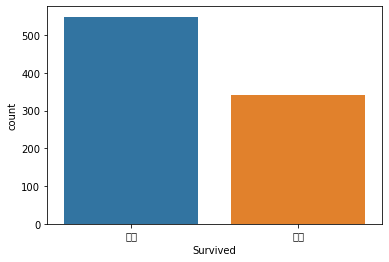

In [82]:
from cProfile import label
from ctypes.wintypes import HFONT
from matplotlib.font_manager import FontProperties
from pandas import DataFrame
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']
# mpl.rcparams['chart.unicode_minus']=False

# ax = DataFrame.plot(df,x='Survived')
# labels = [label.decode("utf-8")for label in df['Survived']]
# ax.set_xticklabels(labels,fontproperties=zhfont)
# plt.show()
chart = sns.countplot(df['Survived'])
chart.set_xticklabels(['死亡','生存'])


In [83]:
#查看路徑
import matplotlib 

print (matplotlib.matplotlib_fname())


c:\Users\j8003\anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


c:\Users\j8003\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '死亡'), Text(1, 0, '生存')]

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
c:\Users\j8003\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 27515 (\N{CJK UNIFIED IDEOGRAPH-6B7B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\j8003\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20129 (\N{CJK UNIFIED IDEOGRAPH-4EA1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\j8003\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 29983 (\N{CJK UNIFIED IDEOGRAPH-751F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\j8003\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 23384 (\N{CJK UNIFIED IDEOGRAPH-5B58}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


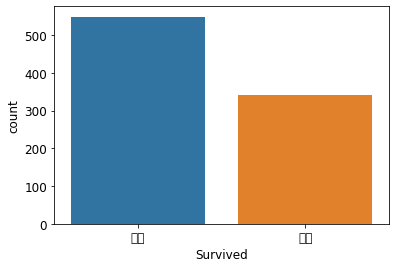

In [86]:
from pylab import mpl

mpl.rcParams['font.size'] = 12  #正文字体

mpl.rcParams["figure.titlesize"] = 80 #标题字体

plt.rc('legend', fontsize=8)  # 图例字体

chart = sns.countplot(df['Survived'])
chart.set_xticklabels(['死亡','生存'])


c:\Users\j8003\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

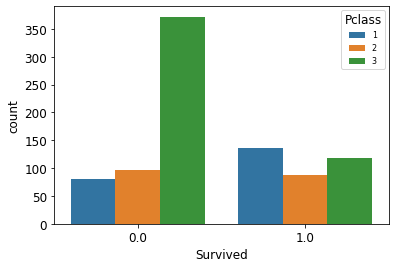

In [107]:
# 觀察艙等跟生存率的關係，可以發現在1艙等的生存率最高、再來是2艙等、最後是3艙等的
sns.countplot(df['Survived'],hue=df['Pclass'])

c:\Users\j8003\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
c:\Users\j8003\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


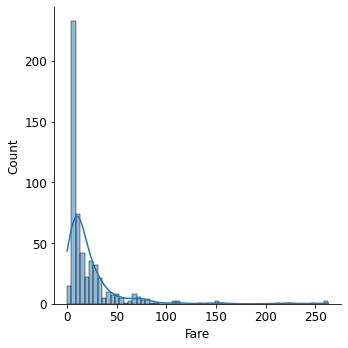

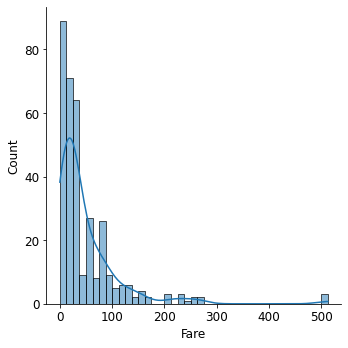

In [109]:
#根據類別實例化faceGrid類，
#g=sns.FacetGrid(df,col="Survived")
#map(function, iterable, ...)
g.map(sns.displot,"Fare",kde=True)
#seaborn.displot([df,'Fare'])

In [35]:
train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [86]:
from sympy import expand

train['first'] = train['Name'].str.split(',',expand=True)

ValueError: Columns must be same length as key

In [116]:
from sqlalchemy import false



data_title = train['Name'].str.split(',',expand=True)[1]

data_title

#nan_dropna.apply(lambda x: x**2 if x.name == 'tot' else x)


0                                  Mr. Owen Harris
1       Mrs. John Bradley (Florence Briggs Thayer)
2                                      Miss. Laina
3               Mrs. Jacques Heath (Lily May Peel)
4                                Mr. William Henry
                          ...                     
886                                    Rev. Juozas
887                           Miss. Margaret Edith
888                 Miss. Catherine Helen "Carrie"
889                                Mr. Karl Howell
890                                    Mr. Patrick
Name: 1, Length: 891, dtype: object

In [117]:
data_title1['first_name'] = data_title.str.split('.',expand=True)

data_title1['first_name']


,0,1,2
0,Mr,Owen Harris,None
1,Mrs,John Bradley (Florence Briggs Thayer),None
2,Miss,Laina,None
3,Mrs,Jacques Heath (Lily May Peel),None
4,Mr,William Henry,None
...,...,...,...
886,Rev,Juozas,None
887,Miss,Margaret Edith,None
888,Miss,"Catherine Helen ""Carrie""",None
889,Mr,Karl Howell,None


In [118]:
data_title1['last_name']= data_title.str.split('.',expand=True)[1]

data_title1['last_name']


0                                 Owen Harris
1       John Bradley (Florence Briggs Thayer)
2                                       Laina
3               Jacques Heath (Lily May Peel)
4                               William Henry
                        ...                  
886                                    Juozas
887                            Margaret Edith
888                  Catherine Helen "Carrie"
889                               Karl Howell
890                                   Patrick
Name: 1, Length: 891, dtype: object